In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import FileLink

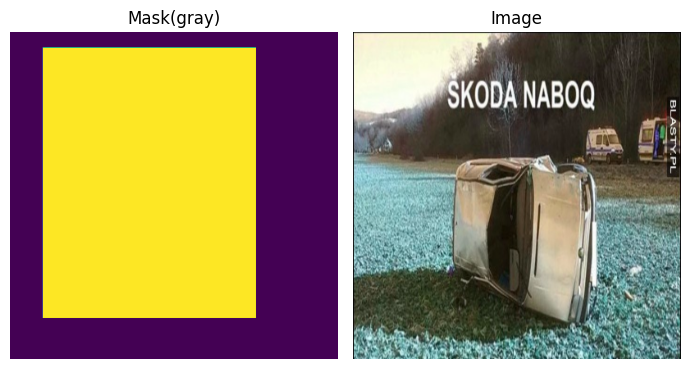

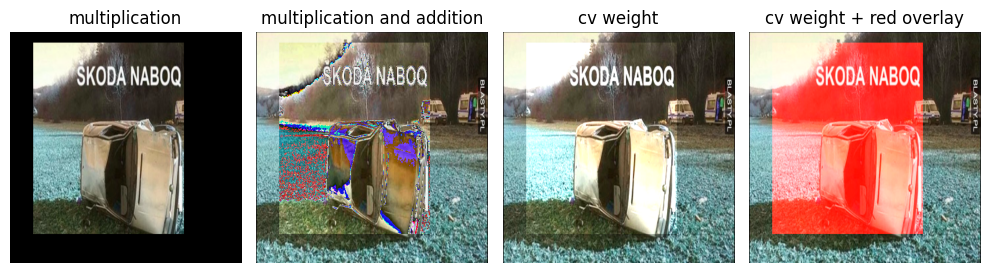

In [2]:
imgPath = 'imageSource/skoda-naboq.jpg'
W = 400

mask = np.zeros([W, W, 3], dtype = np.uint8) 
mask[20:350, 40:300] = 1

image = cv.imread(imgPath)  # Image file
image = cv.resize(image, (W, W))  # Resize to W x W
assert image is not None, "file could not be read, check with os.path.exists()"


mask_gray = cv.cvtColor(mask, cv.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(7, 5))  # 1 row, 2 columns, and adjust the figure size as needed
# Display the mask
ax[0].imshow(mask_gray)
ax[0].set_title('Mask(gray)')
ax[0].axis('off')  # Hide axes

# Display the image
ax[1].imshow(image)
ax[1].set_title('Image')
ax[1].axis('off')  # Hide axes

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

# Multi
result_multi = image * mask

# Multi + add
result_multi_add = result_multi + image

# Weighted
weighted = cv.addWeighted(result_multi, 0.5, image , 1, 0)


# Inverting mask
inverse_mask = 1 - (mask_gray / 255)

# Create a red overlay with the same size as the image
red_overlay = np.zeros_like(image)
red_overlay[:, :] = [255, 0, 0]  #RGB

#Create red mask
red_mask = red_overlay * mask

combined_image = cv.addWeighted(red_mask, 1, image , 1, 0)


fig, ax = plt.subplots(1, 4,  figsize=(10, 6))  # 1 row, 3 columns, and adjust the figure size as needed
ax[0].imshow(result_multi)
ax[0].set_title('multiplication')
ax[0].axis('off')  # Hide axes

ax[1].imshow(result_multi_add)
ax[1].set_title('multiplication and addition')
ax[1].axis('off')  

ax[2].imshow(weighted)
ax[2].set_title('cv weight')
ax[2].axis('off')  

ax[3].imshow(combined_image)
ax[3].set_title('cv weight + red overlay')
ax[3].axis('off')  

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()